

# Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this project, I selected the dataset of Imdb_movie to perform data analysis. This dataset contains information about 1000 movies colletected from The Movie Database (TMDb).**

### Asking Questions:
<ul>
<li><a href="#gen">1. What genres of movie tends to have high popularity?</a></li>
<li><a href="#rev">2. What properties that are associated with high revenue?</a></li>
<li><a href="#dir">3. Who are the directors tend to direct movies with high ratings? </a></li>
</ul>

In [1]:
# import packages that will be used in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


#### General Properties

In [2]:
# Load data and check out the information
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Check the dimension of the dataframe
df.shape

(10866, 21)

In [5]:
# Check the data types and find out if there are missing values of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##### Before I drop any missing values, I want to drop the columns that I would not use the data for this analysis. The reason I drop id and imdb_id is because these are indexing numbers that can not be used as reference. The data under Homepage, Tagline, Keywords, Overview are combined strings can not be used to compute. I select Release year instead of Release data for the year comparision. And I drop budget_adj and revenue_adj because those data are not representative for budget and revenue.**

In [6]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','release_date','budget_adj','revenue_adj'],
        axis = 1,inplace = True)

In [7]:
# Drop the null values
df.dropna(inplace = True)

In [8]:
# Check the number of duplicate rows
sum(df.duplicated())

1

In [9]:
# Drop the duplicate values
df.drop_duplicates(inplace = True)

##### Next I want to drop the rows with zero values under Popularity, Budget, Revenue, Runtime, Vote_average and Vote_count. Since I will analyze the data with multiple variables together, having zero values will affect the output.

In [10]:
df = df[(df[['popularity','budget','revenue','runtime','vote_count','vote_average']]!=0).all(axis = 1)]

In [11]:
# Check the info again to see if we have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 12 columns):
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 386.4+ KB


> Findings: Now the dataframe has no null values, no duplicate data with 12 columns and 3805 rows.

## Data Cleaning 

> **1. I start with analyze the data of popularity, this is the main variable that I would like to dig into with. At first, I want to see the statistics of popularity data.**

In [12]:
# View the min, 25%, 50%, 75%, max values of popularity with Pandas describe.
df.popularity.describe()

count    3805.000000
mean        1.203784
std         1.480569
min         0.010335
25%         0.470651
50%         0.810805
75%         1.387163
max        32.985763
Name: popularity, dtype: float64

> Findings: The output tells me the group of popularity has a maximum value of 32.986 but the 75th percentile of data lie under 1.387. The maximum of 32 is way big than most of its data. It is not normally distributed, it seems like the data are skewed to the left. I want to explore the distribution of this popularity data group.

##### First, I want to cut the data into several groups use bin edges.

In [13]:
# Bin edges that will be used to "cut" the data into groups
bin_edge = [0,0.5,0.999,10,20,30,40]

In [14]:
# Create columns, group by and cut the data into groups
df_cut = df.groupby(pd.cut(df.popularity, bins = bin_edge)).popularity.count()

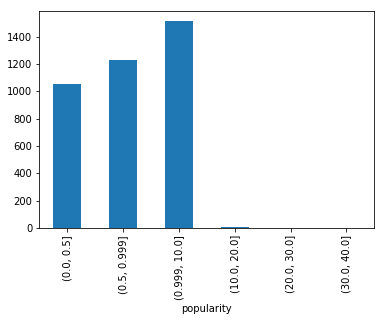

In [15]:
# Plot with bar charts to see what groups of data lie in
df_cut.plot(kind = 'bar')

> Findings: The plot indicates that the distribution of popularity data falls into the range of (0,1). Since I have no source to understand how 'popularity' is measured from, I start to wonder if this popularity data means a 'percentage' that the data out of this range are incorrect data. I want to explore the data seems like 'outliers' more below to see if those data are valubale enough before I decide to drop them.

##### Second, I want to filter the popularity data that are larger than 1.

In [16]:
df_1 = df[df['popularity'] >= 1.0]

##### In the next steps, I want to compare the statistics of df_1 group with vote ratings and revenue.

In [17]:
# Get the statistics of vote_average.
df.vote_average.describe()

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [18]:
# Get the statistics of vote_statistics in df_1 and make comparisons.
df_1.vote_average.describe()

count    1524.000000
mean        6.440223
std         0.754946
min         3.700000
25%         5.900000
50%         6.400000
75%         7.000000
max         8.400000
Name: vote_average, dtype: float64

> Findings: The output indicates that df_1 group has a average 6.4 of vote scores.

In [19]:
# Get the statistics of revenue.
df.revenue.describe()

count    3.805000e+03
mean     1.089734e+08
std      1.772976e+08
min      2.000000e+00
25%      1.433379e+07
50%      4.621664e+07
75%      1.260695e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [20]:
# Get the statistics of revenue in df_1 and make comparisons.
df_1.revenue.describe()

count    1.524000e+03
mean     2.054079e+08
std      2.361673e+08
min      4.200000e+01
25%      5.894727e+07
50%      1.312332e+08
75%      2.594294e+08
max      2.781506e+09
Name: revenue, dtype: float64

> Findings: The output indicates that df_1 group includes the maximum revenue of the whole dataset, which is 2.78 billion. This is an important data. 

##### I decided not to drop this group since those are meaningful data for exploration on revenue and rating score as variables. The df_1 group which out of range (0,1) shows high vote scores and high revenue. It also includes the movie data with maximum revenue. 




> **2. In the next steps I start to clean the genres data, which I found out the data contains constrains ' | ' . I will split the strings. and use apply function to append the new column of genre to the dataframe.**

In [21]:
# ccounts how many gernres in the genres column
df.genres.value_counts()

Drama                                                243
Comedy                                               230
Drama|Romance                                        106
Comedy|Romance                                       103
Comedy|Drama|Romance                                  87
Comedy|Drama                                          85
Horror|Thriller                                       80
Horror                                                57
Drama|Thriller                                        47
Action|Thriller                                       39
Crime|Drama|Thriller                                  37
Drama|Comedy                                          36
Comedy|Family                                         32
Action|Crime|Thriller                                 31
Drama|History                                         27
Drama|Crime                                           27
Crime|Drama                                           26
Action|Crime|Drama|Thriller    

In [22]:
df.genres.value_counts().count()

1043

> Findings: Without cleaning the genres data, there will be 1043 unique genres. This makes genres a complicated and imprecise category to analyze. Therefore it is necessary to split the columns.

In [23]:
# Define a split function
def g(gen):
    return gen.split('|')

# Apply split function
df['gen'] = df.genres.apply(g)

In [24]:
# Use join to split the strings with comma, call this a new column: genre_name
df['genre_name'] = df['gen'].apply(','.join)

In [25]:
# Check the new column to see the data type
df.genre_name

0              Action,Adventure,Science Fiction,Thriller
1              Action,Adventure,Science Fiction,Thriller
2                     Adventure,Science Fiction,Thriller
3               Action,Adventure,Science Fiction,Fantasy
4                                  Action,Crime,Thriller
5                       Western,Drama,Adventure,Thriller
6              Science Fiction,Action,Thriller,Adventure
7                        Drama,Adventure,Science Fiction
8                      Family,Animation,Adventure,Comedy
9                                Comedy,Animation,Family
10                                Action,Adventure,Crime
11              Science Fiction,Fantasy,Action,Adventure
12                                 Drama,Science Fiction
13                         Action,Comedy,Science Fiction
14                      Action,Adventure,Science Fiction
15                           Crime,Drama,Mystery,Western
16                                 Crime,Action,Thriller
17                      Science

> Findings: Now the gernes columns has strings seperated by comma.

> **3. Use same method to split cast, production companies and directors that contains constrain ' | '. And create new columns with strings seperate by comma.**

In [26]:
# Split cast column. Create new column 'cast_name'.
def c(cas):
    return cas.split('|')

df['cas'] = df.cast.apply(c)
df['cast_name'] = df['cas'].apply(','.join)

In [27]:
# Split production_company column. Create new column 'production'.
def p(pro):
    return pro.split('|')

df['pro'] = df.production_companies.apply(p)
df['production'] = df['pro'].apply(','.join)

In [28]:
# Split director column. Create new column 'director_name'.
def d(dir):
    return dir.split('|')

df['dir'] = df.director.apply(d)
df['director_name'] = df['dir'].apply(','.join)

> **4. Now we have three new columns, it is necessary to drop the original columns that will not be used.**

In [29]:
# Use drop to delete the orinigal columns.
df.drop(columns = ['genres','gen','cast','cas','production_companies','pro','director','dir'],inplace = True)

In [30]:
# Check the dataframe
df.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,genre_name,cast_name,production,director_name
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,"Action,Adventure,Science Fiction,Thriller","Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...","Universal Studios,Amblin Entertainment,Legenda...",Colin Trevorrow
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,"Action,Adventure,Science Fiction,Thriller","Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...","Village Roadshow Pictures,Kennedy Miller Produ...",George Miller
2,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,"Adventure,Science Fiction,Thriller","Shailene Woodley,Theo James,Kate Winslet,Ansel...","Summit Entertainment,Mandeville Films,Red Wago...",Robert Schwentke
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,"Action,Adventure,Science Fiction,Fantasy","Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...","Lucasfilm,Truenorth Productions,Bad Robot",J.J. Abrams
4,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,"Action,Crime,Thriller","Vin Diesel,Paul Walker,Jason Statham,Michelle ...","Universal Pictures,Original Film,Media Rights ...",James Wan


<a id='eda'></a>
## Exploratory Data Analysis

### Explores with The 'Top10' plots. 
> **Given the data with movies, first I would like to plots with the Top10 ranking of movies in different categories.**


In [31]:
# Look for the Top10 Popular movie.
df_top10movies = df.sort_values(by = ['popularity'],ascending = False).iloc[:10,:]

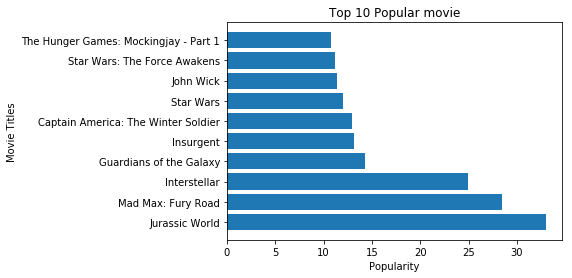

In [32]:
plt.barh(df_top10movies.original_title, df_top10movies.popularity)
plt.ylabel("Movie Titles")
plt.xlabel("Popularity")
plt.title("Top 10 Popular movie")
plt.show()

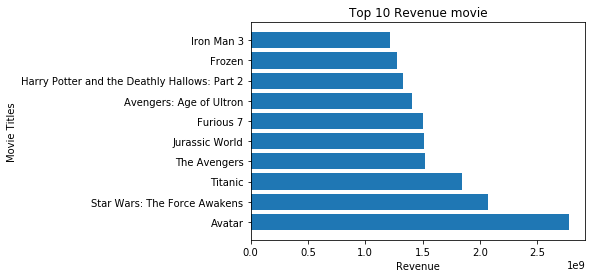

In [33]:
# Look for the Top10 movie with revenue ranking.
df_top10revenue = df.sort_values(by = ['revenue'],ascending = False).iloc[:10,:]
plt.barh(df_top10revenue.original_title, df_top10revenue.revenue)
plt.ylabel("Movie Titles")
plt.xlabel("Revenue")
plt.title("Top 10 Revenue movie")
plt.show()

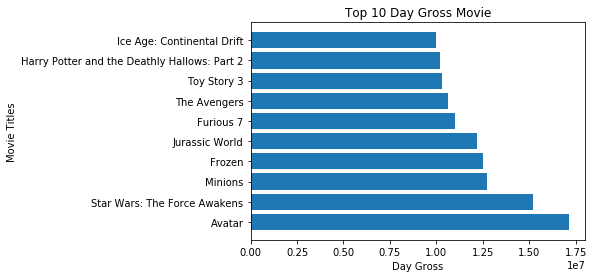

In [34]:
# Look for the Top10 movie with daily gross ranking.
df['day_gross'] = df.revenue/df.runtime
df_top10daygross = df.sort_values(by = ['day_gross'],ascending = False).iloc[:10,:]
plt.barh(df_top10daygross.original_title, df_top10daygross.day_gross)
plt.ylabel("Movie Titles")
plt.xlabel("Day Gross")
plt.title("Top 10 Day Gross Movie")
plt.show()

In [35]:
df[df['original_title']=='Iron Man 3'].popularity

5425    4.946136
Name: popularity, dtype: float64

In [36]:
df[df['original_title'] == 'Titanic'].popularity

5231    4.355219
Name: popularity, dtype: float64

> Findings: Iron man 3 and Titanic are in Top10 Revenue list but not Top10 Day Gross list. Both movies tend to have longer runtime compare to other movies that have high revenues.

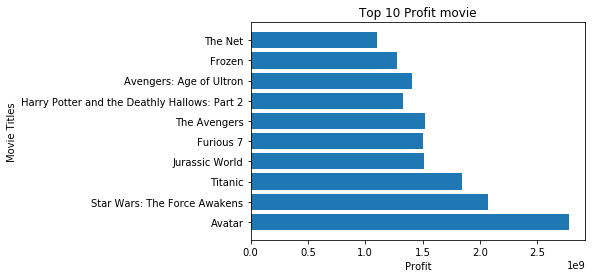

In [37]:
# Look for the Top10 movie with profit ranking.
df['profit'] = df.revenue - df.budget
df_top10profit = df.sort_values(by = ['profit'],ascending = False).iloc[:10,:]
plt.barh(df_top10profit.original_title, df_top10profit.revenue)
plt.ylabel("Movie Titles")
plt.xlabel("Profit")
plt.title("Top 10 Profit movie")
plt.show()

> Findings: Most of movies in Top10 revenue ranking has high profits. Except for 'Toy Story 3'. And ranking for 'Frozen' also moves down in Top10 profit. The genre of both movies is Animation. I will discuss my conclusion in <a href="#conclusions">Conclusions</a></li> setion. 

<a id='gen'></a>
### Research Question 1: What genres of movie tends to have high popularity? <br>
> **First, I want to filter out all the unique genre name.**

In [38]:
# Get unique genre names with splitting columns with comma. 
out_genre = df['genre_name'].str.split(',', expand = True).stack().value_counts()
out_genre

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

> **Compute the average popularity for each unique genre.**

In [39]:
# Create a dataframe: genre_popularity of genres with its average popularity.
genre_popularity = list()

for g in out_genre.index:
    popularity = df[df['genre_name'].str.contains(g)].mean().popularity
    genre_popularity.append(popularity)

In [40]:
# Rename the list with index and reverse dimension.
plot1 = pd.DataFrame([out_genre.index,genre_popularity],index = ('genre','popularity')).transpose().sort_values(by = 'popularity', ascending = False)

> **Plot Popularity Ranking for each genre.**

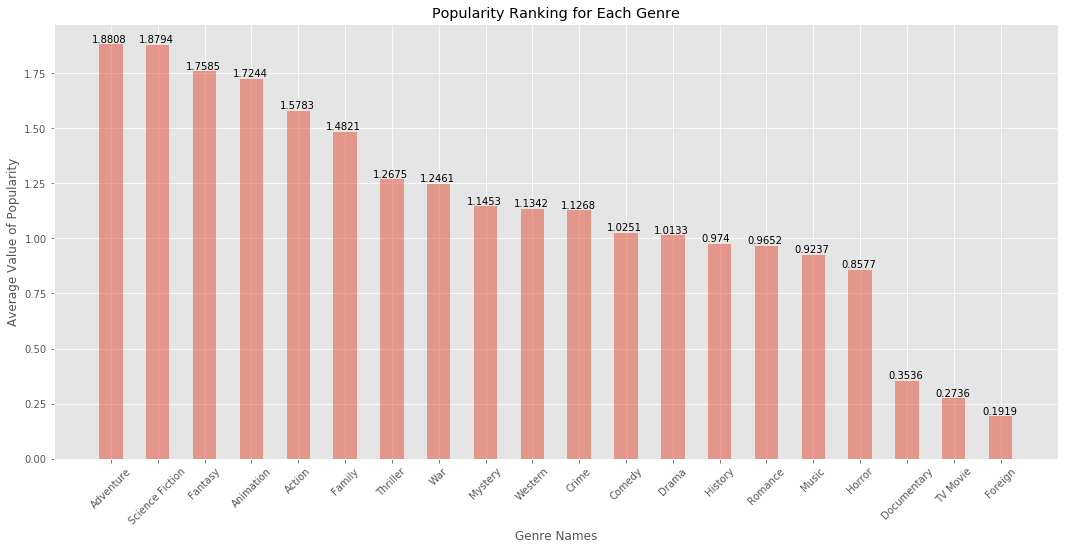

In [41]:
plt.style.use('ggplot')
heights1 = plot1.popularity
x_pos1 = np.arange(len(plot1.genre))

plt.subplots(figsize = (18,8))
plt.bar(plot1.genre,plot1.popularity,width = 0.5,alpha = 0.5,align = 'center')
plt.xticks(rotation = 45)
plt.xlabel('Genre Names')
plt.ylabel('Average Value of Popularity')
plt.title('Popularity Ranking for Each Genre')

value = np.round(heights1.astype(np.double),decimals = 4)
for a,b in zip(x_pos1,value):
    plt.text(a-0.4,b+0.01,str(b))
    
plt.show()

> Findings: This plot helps understand the overall popularity value for each genre. Now we want to put this ranking to segment 'Year', to see which genre hits the highest popularity year by year. Maybe we will find there is a trend related. 

### 1.a. What is the highest popularity genre year by year?

> **Compute the average popularity for each unique genre group by relase year.**

In [42]:
# Create a dataframe year_popularity with average popularity of each genre in each year.
year_popularity = pd.DataFrame()

for g in out_genre.index:
    df_unique = df[df['genre_name'].str.contains(g)]
    popularity2 = df_unique.groupby('release_year').mean().popularity
    year_popularity = pd.concat([year_popularity,popularity2],axis = 1,ignore_index = True)

In [43]:
# Rename the dataframe with name of genres
year_popularity.columns = out_genre.index

In [44]:
# Reverse the dataframe
df_reverse = year_popularity.transpose()

In [45]:
# Check the dataframe
df_reverse

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,1.564871,0.753022,0.641333,0.558673,0.922681,0.913921,0.485092,0.782614,0.522972,1.108561,...,0.825979,0.908422,0.938528,0.978968,0.905732,0.950172,1.321512,1.219134,2.079150,2.041339
Comedy,0.501564,1.244521,NaN,0.920094,1.670163,0.622157,NaN,0.976019,NaN,NaN,...,0.973170,0.895763,0.909829,1.057598,0.918512,1.125697,1.201343,1.275141,2.213240,2.112686
Thriller,2.610362,NaN,3.170651,1.364218,1.908618,1.910465,0.402730,0.856507,0.786854,1.778746,...,1.099332,1.197928,1.221734,1.229228,1.321211,1.344428,1.330660,1.477090,2.848566,3.913396
Action,1.504538,0.464139,1.848380,1.357698,3.153791,1.266311,0.347789,1.338467,0.678138,1.778746,...,1.189849,1.270305,1.445200,1.769773,1.553890,1.588119,2.122119,1.902791,4.005362,5.412644
Adventure,1.872132,1.693268,1.621842,1.586280,3.153791,1.266311,0.253584,1.361477,1.677185,1.197318,...,1.279105,1.573169,1.386773,1.942461,2.179113,1.861790,2.517433,2.239812,5.115215,5.864179
Romance,0.501564,1.752027,NaN,0.862313,0.408402,1.297865,0.299911,0.719199,0.045242,NaN,...,1.033224,0.816563,1.097606,0.943594,1.021499,1.116229,1.169046,1.176037,1.446583,2.108030
Crime,NaN,0.900245,0.810805,NaN,0.663446,NaN,NaN,0.678960,0.786854,1.357317,...,0.945301,0.891323,1.354948,0.738147,0.983650,1.385933,1.406413,1.409273,2.026763,2.901992
Science Fiction,NaN,NaN,NaN,NaN,NaN,NaN,0.207257,NaN,1.502458,NaN,...,1.298784,1.265211,1.166449,1.798229,1.830359,1.884418,1.755742,2.882717,5.482694,7.594638
Horror,2.610362,0.249542,NaN,1.139321,NaN,NaN,NaN,NaN,0.724527,NaN,...,0.686208,1.012025,0.555925,0.892816,0.716326,0.839402,1.086958,1.298901,1.231575,1.505638
Family,NaN,1.467885,NaN,NaN,1.310850,1.313676,NaN,1.395994,0.633129,NaN,...,1.258872,1.650521,1.407257,1.568001,1.808135,1.377305,1.609679,1.543713,2.394299,3.373933


> Findings: This dataframe gives the result of average popularity of each genre for each year. There are NaN values. I am going to pick the highest value for each year, which gives me the most popular genre for that year.

In [46]:
# Combine the dataframe with the maximum popularity value for each year, and indexing with the matching genre name.
year_popularity2 = pd.concat([df_reverse.idxmax(),df_reverse.max()],axis = 1)

In [47]:
# Rename the dataframe with column name genre, maximum_average_popularity
year_popularity2.columns = ['genre','maximum_average_popularity']
year_popularity2.index.name = 'Year'

In [48]:
# Take a look at the dataframe
year_popularity2

,genre,maximum_average_popularity
Year,,
1960,Thriller,2.610362
1961,Animation,2.631987
1962,Thriller,3.170651
1963,Adventure,1.586280
1964,Action,3.153791
1965,Thriller,1.910465
1966,Drama,0.485092
1967,Animation,2.550704
1968,Mystery,1.728887


> Findings: This dataframe has the highest average popularity value with matching genre by year 1960 to 2015. We could definitely use a plot to visualize the result but it would be too long to be clear. I want to pick the recent ten years' data (2005-2015) for the final plot.

> **Plot the recent 10 years of most popular genre.**

In [49]:
# Cut the dataframe with last ten rows of data.
plot2 = year_popularity2.iloc[45:,:]

In [50]:
# Check.
plot2

,genre,maximum_average_popularity
Year,,
2005,Fantasy,1.747583
2006,Animation,1.537277
2007,Fantasy,1.759555
2008,Animation,1.507001
2009,War,2.711016
2010,Adventure,2.179113
2011,Fantasy,1.977175
2012,Western,5.944518
2013,Science Fiction,2.882717


> Findings: Now we have the data for year 2005 - 2015. Let's get a bar chart for the comparison.

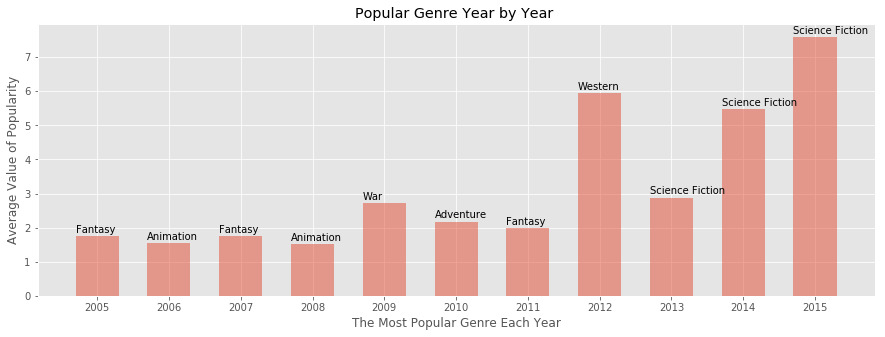

In [51]:
plt.style.use('ggplot')
heights2 = plot2.maximum_average_popularity.values
x_pos2 = np.arange(2005,2016,1)
y = plot2.genre

plt.subplots(figsize = (15,5))
plt.bar(plot2.index,heights2,width = 0.6,alpha = 0.5,align = 'center')
plt.xticks(plot2.index)
plt.xlabel('The Most Popular Genre Each Year')
plt.ylabel('Average Value of Popularity')
plt.title('Popular Genre Year by Year ')

value2 = np.round(heights2.astype(np.double),decimals = 4)
for a,b,c in zip(x_pos2,value2,plot2.genre):
    plt.text(a-0.3,b+0.1, c)

plt.show()

<a id='rev'></a>
### Research Question 2: What kinds of properties associated with movie with high revenues. 

> **First, define the range of high revenue.**

In [52]:
# Get the statistics of revenue.
df.revenue.describe()

count    3.805000e+03
mean     1.089734e+08
std      1.772976e+08
min      2.000000e+00
25%      1.433379e+07
50%      4.621664e+07
75%      1.260695e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [53]:
# Define high revenue with values above 75th percentile.
df_highrevenue = df[df['revenue'] >= 1.260695e+08]

> **Second, find rankings on genre, release year, production companies, casts, directors and popularity value asscoaited with high revenue.**

In [54]:
# Find the average revenue for each genre. 
# Create a dataframe genre_revenue, and compute the average revenue for each genre.
genre_revenue = list()

for g in out_genre.index:
    revenue = df_highrevenue[df_highrevenue['genre_name'].str.contains(g)].mean().revenue
    genre_revenue.append(revenue)

In [55]:
# Rename column and sort the values of average revenue for genres.
plot3 = pd.DataFrame([out_genre.index,genre_revenue],index = ('genre','revenue')).transpose().sort_values(by = 'revenue',ascending=False)

In [56]:
# Reset the index to genre .
plot3.set_index(['genre'], inplace = True)

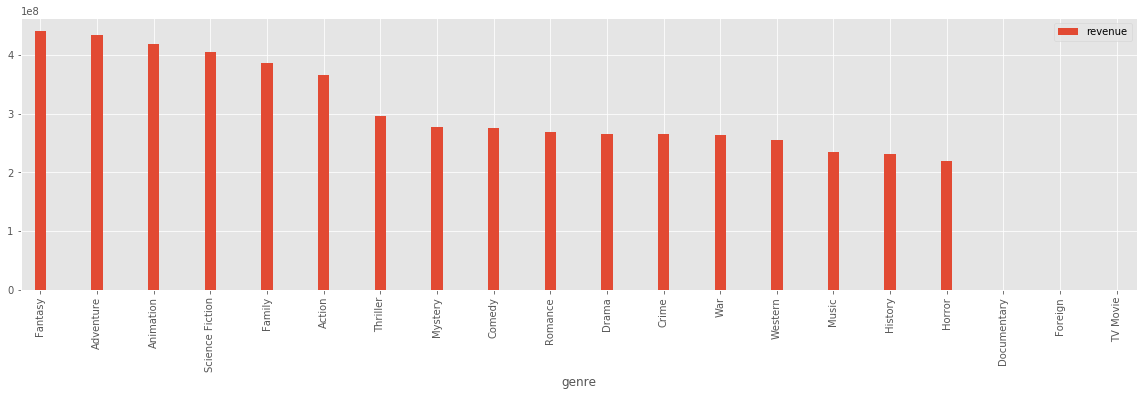

In [57]:
# Plot the average revenue for each genres in descending order. 
plot3.plot(kind = 'bar',width = 0.2,figsize = (20,5)) 

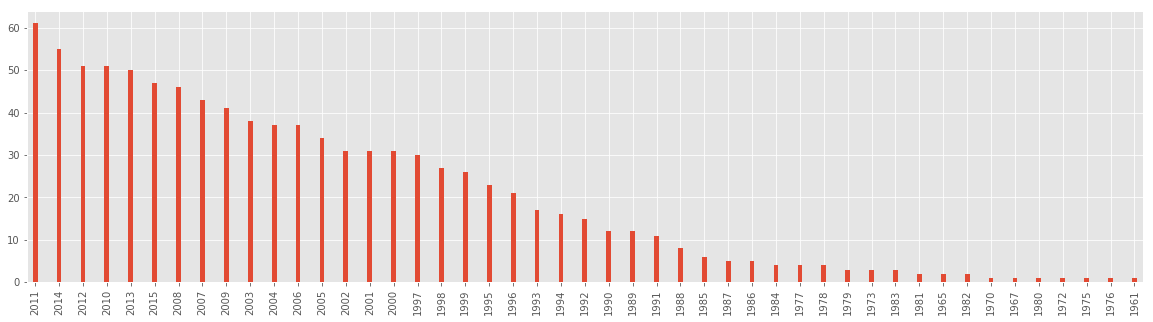

In [58]:
# Plot the years in order with numbers of movies with high revenue.
df_highrevenue.release_year.value_counts().plot(kind = 'bar',width = 0.2,figsize = (20,5))

> Findings: 2011 have over 60 movies that have high revenues, which is the most in the list of year. 

In [59]:
# Find the production companies that produce high revenue movies. 
high_production = df_highrevenue['production'].str.split(',', expand = True).stack().value_counts()

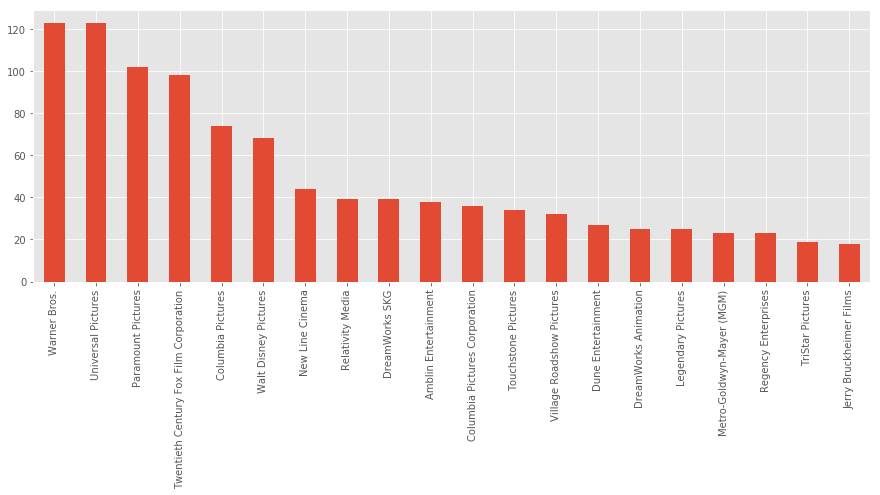

In [60]:
# Plot the top 20 production companies.
high_production.iloc[:20].plot(kind ='bar',figsize = (15,5))

> Findings: Universal pictures have over 120 movies that have high revenue. Followed by Warner Brothers, Paramount Pictures, Twentieth Century Fox Film Coorperation, Columbia Picture and Walt Disney Pictures. 

In [61]:
# Find the cast who play in the movies with high revenue. 
high_cast = df_highrevenue['cast_name'].str.split(',', expand = True).stack().value_counts()

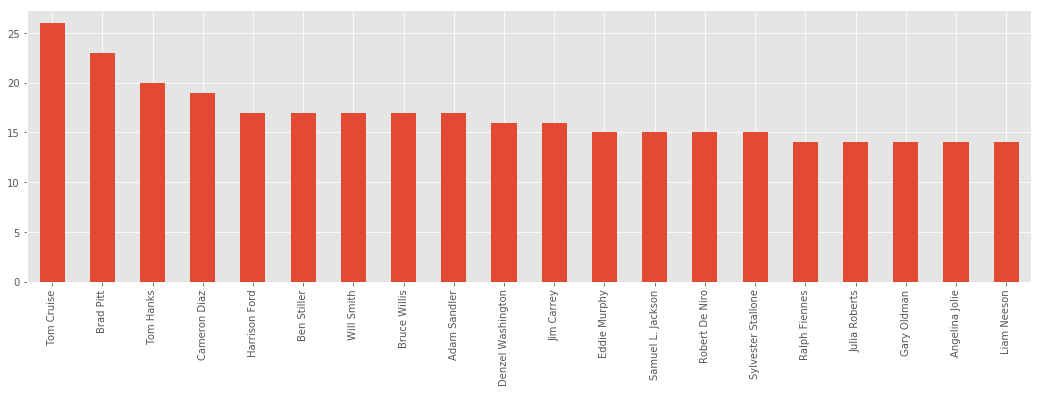

In [62]:
# Plot the top 20 casts who play the most movies with high revenue.
high_cast.iloc[:20].plot(kind = 'bar',figsize = (18,5))

> Findings: Rober De Nitro played over 50 movies that have high revenue. Followed by Bruch Willis, Samual Jackson, Nicolas Cage, Matt Damon and Johnny Depp. 

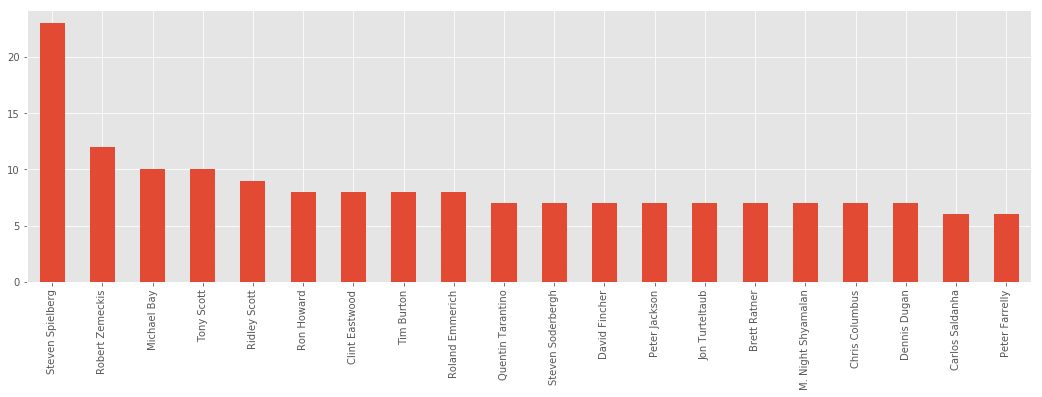

In [63]:
# Find out the directors who direct the most movies with high revenue. Plot the top 20.
high_director = df_highrevenue['director_name'].str.split(',', expand = True).stack().value_counts()
high_director.iloc[:20].plot(kind = 'bar',figsize = (18,5))

> Findings: Steven Spielberg directed over 25 movies that have high revenue, which is much more that the followed directors Robert Zemeckis. 

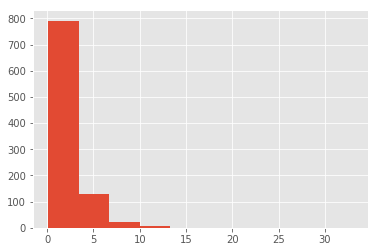

In [64]:
# Find out the range of popularity of high revenue movies.
df_highrevenue.popularity.hist()

In [65]:
df_highrevenue.popularity.describe()

count    952.000000
mean       2.334476
std        2.332131
min        0.131526
25%        1.143910
50%        1.731402
75%        2.697235
max       32.985763
Name: popularity, dtype: float64

> Findings: The mean popularity of high revenue movies are 2.3344. And it includes the movie with highest value of popularity, which is 32.986.

<a id='dir'></a>
### Research Question 3: Who are the directors tend to direct movies with high ratings?

> **Compute the average vote rating for each director.**

In [66]:
# Find out the number of movies each director directed in the dataset.
out_director = df['director_name'].str.split(',',expand = True).stack().value_counts()
out_director

Steven Spielberg         28
Clint Eastwood           24
Ridley Scott             21
Woody Allen              18
Steven Soderbergh        17
Robert Rodriguez         17
Martin Scorsese          17
Tim Burton               17
Renny Harlin             15
Oliver Stone             15
Brian De Palma           15
Robert Zemeckis          15
Wes Craven               14
Ron Howard               14
Joel Schumacher          14
Tony Scott               14
Richard Donner           13
Peter Farrelly           13
Francis Ford Coppola     13
Barry Levinson           12
Joel Coen                12
Rob Reiner               12
Walter Hill              12
Quentin Tarantino        12
John Carpenter           12
Michael Bay              11
Bobby Farrelly           11
John Landis              11
Kevin Smith              11
Peter Jackson            11
                         ..
Jennifer Flackett         1
Dean Wright               1
David Carson              1
Christophe Gans           1
Drew Barrymore      

In [67]:
# Create a datarame director_rating withe the ranking of average vote scores.
director_rating = list()

for d in out_director.index:
    rating = df[df['director_name'].str.contains(d)].mean().vote_average
    director_rating.append(rating)

In [68]:
# Rename the column and re-order the rows with dscending values of average vote scores.
plot4 = pd.DataFrame([out_director.index,director_rating],index = ('director','rating')).transpose().sort_values(by = 'rating',ascending = False)

In [69]:
# Reset the index and check the dataframe
plot4.reset_index(drop = True)

,director,rating
0,Damien Chazelle,8.2
1,Xavier Dolan,8
2,Tony Kaye,8
3,Morten Tyldum,8
4,Lenny Abrahamson,8
5,Rajkumar Hirani,7.8
6,Lucy Walker,7.8
7,Josh Boone,7.8
8,Ashutosh Gowariker,7.8
9,Richard Marquand,7.8


> Findings: Now I have the average vote ratings for movies directed by 1752 directors, in order of average scores. 

> **Define high ratings.**

In [70]:
# Get the statistics of vote_average.
df.vote_average.describe()

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [71]:
# Define high ratings with rating scores higher that 75the percentile. 
plot5 = plot4[plot4['rating'] >= 6.70]

In [72]:
# Check the data.
plot5.reset_index(drop = True)

,director,rating
0,Damien Chazelle,8.2
1,Xavier Dolan,8
2,Tony Kaye,8
3,Morten Tyldum,8
4,Lenny Abrahamson,8
5,Rajkumar Hirani,7.8
6,Lucy Walker,7.8
7,Josh Boone,7.8
8,Ashutosh Gowariker,7.8
9,Richard Marquand,7.8


> Findings: 324 directors direct movies that have average high rating scores. 

<a id='conclusions'></a>
## Conclusions



### Limitations
1. One limitation of my explorations is I drop a lot of zero values in budge, revenue, runtime and vote columns all together. It shrinks the data frame from 9876 to 3805 rows, which means a lot data. If I have more time I would carefully drop the zero values columns by columns when I dig into particular variables and other variables are possible to have zero values. Otherwise, the sample size shrinks too much and the result would be influenced. 
2. With the main variable ‘popularity’, I could not understand it well so after exploration I just leave all the raw data of popularity as they are. There are possibilities that some of the popularity data might be incorrect and need to be dropped.
3. The objective of my exploration is to focus on one variable, dig into it, and find how other variables relate to it. If I have more time, I would like to explore the correlations between multiple variables. For example, asking question like, are movies with high popularities related with high revenue? Or question like, is there a correlation between popularity and vote rating?

### On Top10 Explorations:
<li>The top 10 popular movies are not on the list of top 10 revenue movies. It is an interesting finding. Because the intuitive assumption on popular movies are movies that consumers would like to pay to watch. It seems like that the measurement of popularity is not how much consumers like to pay for the movie.</li>
<li>The movie 'Iron Man 3' and 'Titanic' have longer runtime compare to other high revenue movies. The popularities of both movies are around 4.5, which are defined as 'high popularity'. It seems like those two movies were popular at that time so they were running a longer time period.</li>
<li>In comparison of Top10 revenue movie and Top10 profit movie, 'Toy Story 3' and 'Frozen' are movies have high revenue but relatively low profit. It seems like the genre 'Animation' has a high cost on production compare to other genres.</li>

### On Genre Explorations:
<li>Overall, 'Adventure' has the highest average popularity which is 1.8808. Followed by ‘Science Fiction’, ‘Fantasy’,  ‘Animation’,  ‘Action’ and ‘Family’. Those genres have average popularity above 1.40.</li>
<li>Orderly, 'Thriller',  'War',  'Mystery',  'Western',  'Crime',  'Comedy' and 'Drama' have average popularity above 1.0.</li>
<li>Genres of 'History',  'Romance',  'Music',  'Horror' have a low popularity below 1.0</li>
<li>The lowest popularity are genres 'Documentary',  'TV movie' and 'Foreign' movies.</li>

### On Genre by Year Explorations:
<li>'Science Fiction' ranks the most popular genre for year 2013-2015. The popularity of ‘Science Fiction’ increased from 2.88 to 5.45 from 2013 to 2014. And it increased to 7.59 in 2015. There is a trend for this genre of movie getting more and more popular for consumers in recent years. </li>
<li>The most popular genre 'Adventure' only hits the highest popularity ranking on 2010. It seems like on 2010, there were a lot of Adventure movies released that are very popular overall.</li>
<li> Surprisingly, 'Western' is the most popular genre in year 2012 which it has an overall medium average popularity of 1.13.</li>

### On High Revenue Explorations:
<li> The top 5 genres associated with high revenue are ‘Fantasy’, ‘Adventure’, ‘Animation’, ‘Science Fiction’ and ‘Family’.</li>
<li>Year 2011 have most movies with high revenue, followed by year 2014, 2012, 2010, 2013 and 2015.</li>
<li>Production company Universal Pictures and Warner Brothers have most movies with high revenue. Followed by Paramount Pictures, Twentieth Century Fox, Columbia and Walt Disney.</li>
<li>Cast Robert De Niro play in most movies with high revenue. Followed by Bruce Willis, Samuel Jackson, Nicolas Cage, Matt Damon and Johnny Depp.</li>
<li> Director Steven Spielberg directs over 25 movies with high revenues, which is much more than the followed directors Robert Zemeckis.</li>
<li> The average popularity of high revenue movies is 2.33. Most of movies have popularity between 0.13 to 2.70. The highest popularity for high revenue movies are 32.986.</li>

### On Directors with High Ratings Explorations:
<li>Director Damien Chazelle directs movies of highest average ratings 8.0 . Followed by Tony Kaye, Morten Tyldum, Xavier Dolan and Lenny Abrahamson. </li>
<li>Average rating with 6.7 is considered as high rating. There are 324 directors have movies with high ratings </li>
